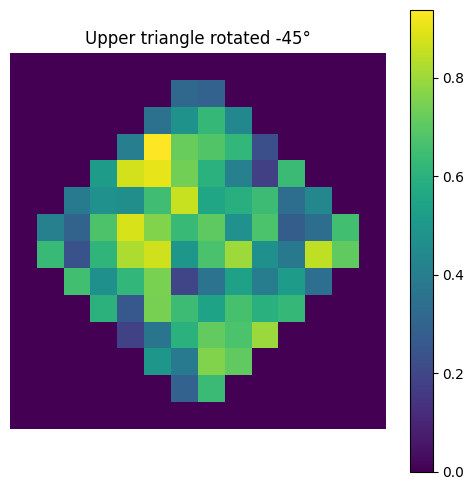

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = np.random.rand(10, 10)
mask = np.tril(np.ones_like(data, dtype=bool))
data = np.ma.array(data, mask=mask)

# Rotate the matrix by 45 degrees
from scipy.ndimage import rotate
rotated_data = rotate(data, angle=-45, reshape=True, order=1)

# Plot
plt.imshow(rotated_data, origin='lower', cmap='viridis')
plt.colorbar()

# This part is illustrative: placing annotations along the rotated diagonal is non-trivial
# and would require transforming positions manually.

plt.title("Upper triangle rotated -45°")
plt.axis('off')
plt.show()

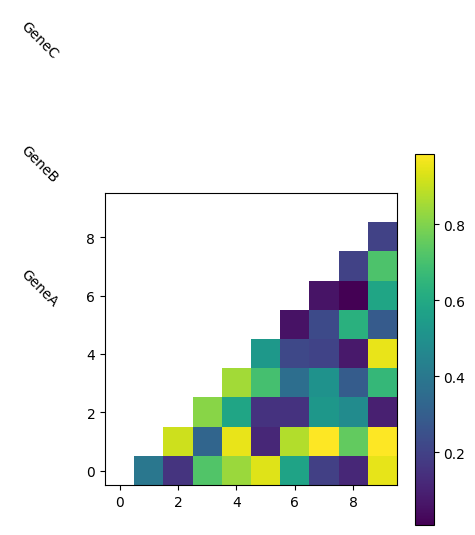

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data

data = np.random.rand(10, 10)

# Create a mask to hide the lower triangle

mask = np.tril(np.ones_like(data, dtype=bool))
data = np.ma.array(data, mask=mask)

# Plot the upper triangular data

plt.imshow(data, origin='lower')

# List of genes and their positions along the chromosome (for example purposes)

genes = ["GeneA", "GeneB", "GeneC"]
gene_positions = [2, 5, 8]  # Corresponding indices on the diagonal

# Rotate the plot by 45 degrees

ax = plt.gca()
ax.set_aspect('equal')
trans = ax.transData + plt.matplotlib.transforms.Affine2D().rotate_deg(45)

# Annotate genes along the diagonal

for gene, pos in zip(genes, gene_positions):
    ax.annotate(gene, (pos, pos), xycoords=trans, textcoords='offset points', xytext=(0,10), ha='center', va='bottom', rotation=-45)

plt.colorbar()
plt.show()



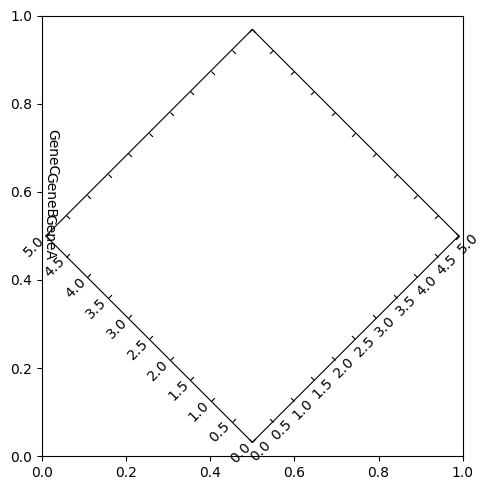

In [56]:
# import the packages
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

# set the figure size
plt.rcParams["figure.figsize"] = [5.00, 5]
plt.rcParams["figure.autolayout"] = True

# plot the figure
fig = plt.figure()

plt.subplot(1, 1, 1)

scales = (0, 5, 0, 5)

# Add 2D affine transformation
t = Affine2D().rotate_deg(45)

# Add floating axes
h = floating_axes.GridHelperCurveLinear(t, scales)
ax = floating_axes.FloatingSubplot(fig, 111, grid_helper=h)

genes = ["GeneA", "GeneB", "GeneC"]
gene_positions = [2, 3, 4]  # Corresponding indices on the diagonal


for gene, pos in zip(genes, gene_positions):
    ax.annotate(gene, (pos, pos), 
                xycoords=trans, 
                textcoords='offset points', 
                xytext=(pos, pos), 
                ha='center', va='bottom', rotation=-90)

fig.add_subplot(ax)

plt.show()

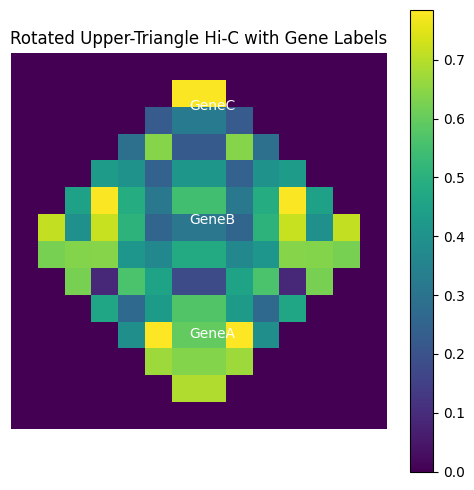

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from matplotlib.transforms import Affine2D

# Generate symmetric contact matrix
np.random.seed(0)
data = np.random.rand(10, 10)
data = (data + data.T) / 2  # make symmetric

# Mask lower triangle
mask = np.tril(np.ones_like(data, dtype=bool))
masked_data = np.ma.array(data, mask=mask)

# Rotate the masked matrix -45 degrees
rotated_data = rotate(masked_data, angle=-45, reshape=True, order=1)

# Display rotated image
fig, ax = plt.subplots()
im = ax.imshow(rotated_data, origin='lower', cmap='viridis')
plt.colorbar(im, ax=ax)

# Original gene positions (diagonal of unrotated matrix)
gene_positions = [2, 5, 8]
genes = ["GeneA", "GeneB", "GeneC"]

# Compute center of the original matrix
n = data.shape[0]
center = np.array([n/2, n/2])

# Rotation matrix for -45°
theta = -np.pi / 4
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# Transform and annotate
for gene, pos in zip(genes, gene_positions):
    orig_coord = np.array([pos, pos]) - center  # center on origin
    rotated_coord = R @ orig_coord              # rotate
    rotated_coord += np.array(rotated_data.shape) / 2  # shift to image coords
    ax.text(rotated_coord[1], rotated_coord[0], gene,
            ha='center', va='bottom', rotation=0, color='white')

ax.set_title("Rotated Upper-Triangle Hi-C with Gene Labels")
ax.axis('off')
plt.tight_layout()
plt.show()

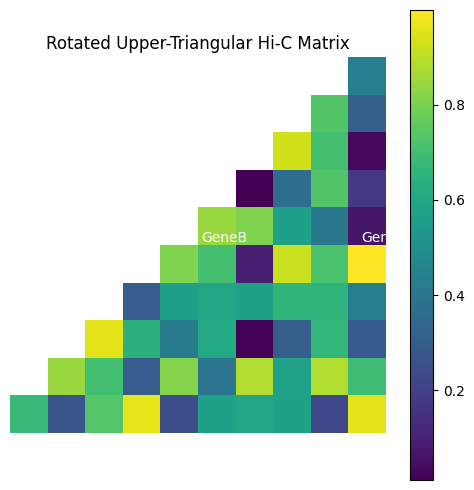

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.transforms import Affine2D

# Generate upper-triangular data
n = 10
data = np.random.rand(n, n)
data = np.triu(data)  # upper triangle only

# Build coordinates for triangular matrix
x = np.arange(n+1)
y = np.arange(n+1)
X, Y = np.meshgrid(x, y)

# Mask the lower triangle for plotting
mask = np.tril(np.ones_like(data, dtype=bool), -1)
masked_data = np.ma.masked_array(data, mask=mask)

# Plot
fig, ax = plt.subplots()
pcm = ax.pcolormesh(X, Y, masked_data, cmap='viridis', shading='auto')

# Rotate entire plot (coordinate system)
trans = Affine2D().rotate_deg_around(n/2, n/2, -45) + ax.transData
for coll in pcm.get_paths():
    coll._transform = trans

# Set limits and aspect
ax.set_xlim(0, n)
ax.set_ylim(0, n)
ax.set_aspect('equal')
plt.colorbar(pcm, ax=ax)

# Overlay gene labels on rotated diagonal
gene_positions = [2, 5, 8]
genes = ["GeneA", "GeneB", "GeneC"]

# Apply same rotation transform to text
for gene, pos in zip(genes, gene_positions):
    ax.text(pos+0.5, pos+0.5, gene, transform=trans,
            ha='center', va='bottom', rotation=0, color='white')

plt.title("Rotated Upper-Triangular Hi-C Matrix")
plt.axis('off')
plt.tight_layout()
plt.show()

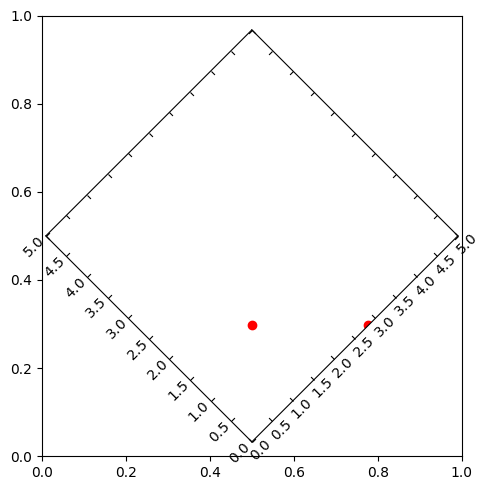

In [59]:
# import the packages
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

# set the figure size
plt.rcParams["figure.figsize"] = [5.00, 5]
plt.rcParams["figure.autolayout"] = True

# plot the figure
fig = plt.figure()

plt.subplot(1, 1, 1)

scales = (0, 5, 0, 5)

# Add 2D affine transformation
t = Affine2D().rotate_deg(45)

# Add floating axes
h = floating_axes.GridHelperCurveLinear(t, scales)
ax = floating_axes.FloatingSubplot(fig, 111, grid_helper=h)

ax.scatter([0, 2], [2, 2], color='red')

fig.add_subplot(ax)

genes = ["GeneA", "GeneB", "GeneC"]
gene_positions = [2, 3, 4]  # Corresponding indices on the diagonal


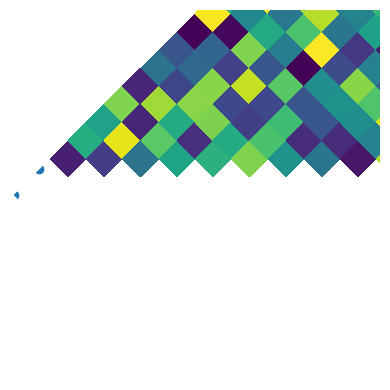

In [89]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.angle_helper as angle_helper
import mpl_toolkits.axisartist.floating_axes as floating_axes
from mpl_toolkits.axisartist.grid_finder import (DictFormatter, FixedLocator,
                                                 MaxNLocator)

# Fixing random state for reproducibility
np.random.seed(19680801)


def setup_axes1(fig, rect):
    """
    A simple one.
    """
    tr = Affine2D().scale(1, 1).rotate_deg(-45)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, 10, 0, 10),
        grid_locator1=MaxNLocator(nbins=4),
        grid_locator2=MaxNLocator(nbins=4)
    )

    ax1 = fig.add_subplot(
        rect, axes_class=floating_axes.FloatingAxes, grid_helper=grid_helper)
#    ax1.grid()
    
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.set_xlim(0, n)
    aux_ax.set_ylim(0, n)
    aux_ax.set_aspect('equal')
    
    for key in aux_ax.axis:
        ax1.axis[key].set_visible(False)
    
    return ax1, aux_ax

fig = plt.figure(figsize=(4, 4))
#fig.subplots_adjust(wspace=0.3, left=0.05, right=0.95)
ax1, aux_ax1 = setup_axes1(fig, 111)
#aux_ax1.bar([0, 1, 2, 3], [3, 2, 1, 3])    ;

# Generate upper-triangular data
n = 100
data = np.random.rand(n, n)
data = np.tril(data)  # upper triangle only

# Build coordinates for triangular matrix
x = np.arange(n+1)
y = np.arange(n+1)
X, Y = np.meshgrid(x, y)

# Mask the lower triangle for plotting
mask = np.triu(np.ones_like(data, dtype=bool), -1)
masked_data = np.ma.masked_array(data, mask=mask)

# Plot
pcm = aux_ax1.pcolormesh(X, Y, masked_data, cmap='viridis', shading='auto')

ax1.scatter(range(10), range(10))


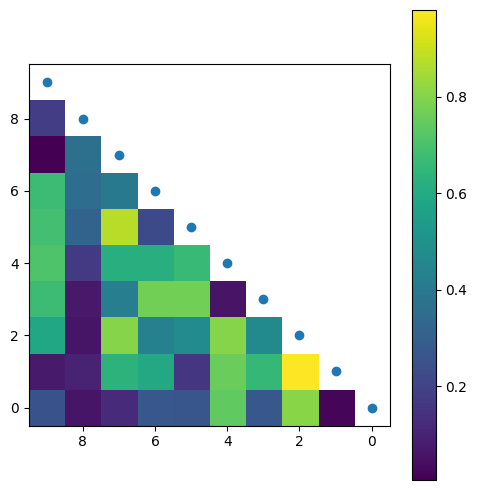

In [85]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.rand(10, 10)
mask = np.tril(np.ones_like(data, dtype=bool))
data = np.ma.array(data, mask=mask)
plt.imshow(data, origin='lower')

genes = ["GeneA", "GeneB", "GeneC"]

ax = plt.gca()
ax.xaxis.set_inverted(True) 
ax.set_aspect('equal')
# trans = ax.transData + plt.matplotlib.transforms.Affine2D().rotate_deg(-45)

# Annotate genes along the diagonal

pos = list(range(10))
ax.scatter(pos, pos)

# for gene, pos in zip(genes, gene_positions):
#     ax.annotate(gene, (pos, pos), xycoords=trans, textcoords='offset points', xytext=(0,0), ha='center', va='bottom', rotation=-45)

plt.colorbar()
plt.show()
